# Homework 5

This homework asks you to create your first Neural Network.

In this Homework, you will be using the MNIST Dataset from Keras

You will write code and discussion into code and text cells in this notebook.

If a code block starts with TODO:, this means that you need to write something there.

There are also markdown blocks with questions. Write the answers to these questions in the specified locations.

Some code had been written for you to guide the project. Don't change the already written code.

## Grading
The points add up to 10. Extensive partial credit will be offered. Thus, make sure that you are at least attempting all problems.

Make sure to comment your code, such that the grader can understand what different components are doing or attempting to do.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.utils import to_categorical

# A. Setup (2 points).

In this project we are going to create a Neural Network which will train on the MNIST dataset.

The Dataset contains 60000 Training images and 10000 Testing images and the images are from 10 classes.

You will be loading the MNIST datset in training and testing variables.

Display the first 10 images using Matplotlib

Print the shape of the data points

Normalize the Data in [0,1] range.

Convert the labels into one hot code encoding

11490434/11490434 [==============================] - 0s 0us/step


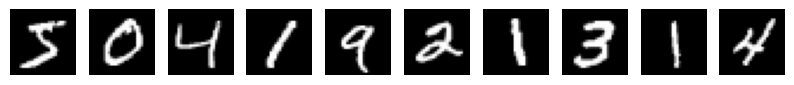

Shape of Training Data: (60000, 28, 28)
Shape of Testing Data: (10000, 28, 28)


In [2]:

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display the first 10 images
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# Print the shape of the data points
print("Shape of Training Data:", X_train.shape)
print("Shape of Testing Data:", X_test.shape)

# Normalize the data in [0,1] range
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert the labels into one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


# B. Creating a Dense Neural Network to train on this data. (4 Points)

In this section you will be creating a Neural Netwok based on the specifications
below. This exercise will help you create the network and help run the code.

Input Layer-> Flatten Layer that convert the image matrix to a vector

Hidden Layer->Dense Layer with 4 units and sigmoid activation

Output Layer-> Dense Layer with 10 units and softmax activation.

Print the Summary of the model at the end

In [3]:
#TODO
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Create the model
model = Sequential()

# Input Layer (Flatten layer)
model.add(Flatten(input_shape=(28, 28)))  # Assuming MNIST images are 28x28 pixels

# Hidden Layer
model.add(Dense(4, activation='sigmoid'))

# Output Layer
model.add(Dense(10, activation='softmax'))

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 10)                50        
                                                                 
Total params: 3190 (12.46 KB)
Trainable params: 3190 (12.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile and Run the Model

Epoch 1/25
422/422 [==============================] - 10s 11ms/step - loss: 1.9124 - accuracy: 0.4388 - val_loss: 1.6604 - val_accuracy: 0.5952
Epoch 2/25
422/422 [==============================] - 4s 10ms/step - loss: 1.5177 - accuracy: 0.6236 - val_loss: 1.3762 - val_accuracy: 0.6757
Epoch 3/25
422/422 [==============================] - 3s 8ms/step - loss: 1.2888 - accuracy: 0.6797 - val_loss: 1.1796 - val_accuracy: 0.7313
Epoch 4/25
422/422 [==============================] - 3s 6ms/step - loss: 1.1198 - accuracy: 0.7260 - val_loss: 1.0253 - val_accuracy: 0.7568
Epoch 5/25
422/422 [==============================] - 2s 4ms/step - loss: 0.9953 - accuracy: 0.7440 - val_loss: 0.9194 - val_accuracy: 0.7665
Epoch 6/25
422/422 [==============================] - 1s 3ms/step - loss: 0.9090 - accuracy: 0.7531 - val_loss: 0.8440 - val_accuracy: 0.7737
Epoch 7/25
422/422 [==============================] - 1s 3ms/step - loss: 0.8465 - accuracy: 0.7605 - val_loss: 0.7889 - val_accuracy: 0.7825
Epo

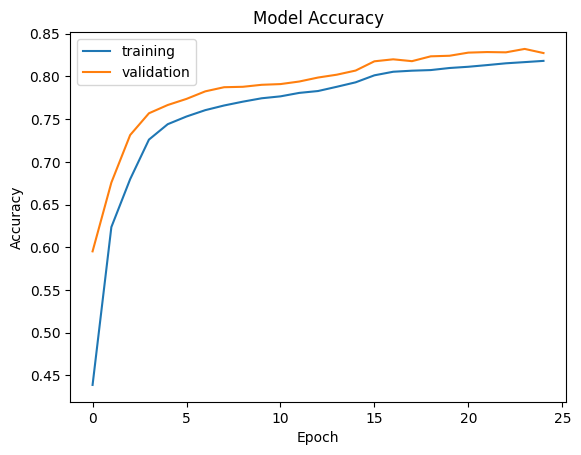

In [4]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(X_train,y_train,batch_size=128, epochs=25, verbose= True,validation_split=0.1)
loss,accuracy=model.evaluate(X_train,y_train,verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show

print(f'Testloss: {loss:.3}')
print(f'Accuracy: {accuracy:.3}')

# Extra Credit (2 Points)
Create a Neural Network that will have more than 95% Training Accuracy

In [5]:
#TODO

from keras.models import Sequential
from keras.layers import Flatten, Dense

# Create the model
model = Sequential()

# Input Layer (Flatten layer)
model.add(Flatten(input_shape=(28, 28)))  # Assuming MNIST images are 28x28 pixels

# Hidden Layer with increased units
model.add(Dense(18, activation='relu'))  # Increase units and change activation function to ReLU

# Output Layer
model.add(Dense(10, activation='softmax'))

#Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 18)                14130     
                                                                 
 dense_3 (Dense)             (None, 10)                190       
                                                                 
Total params: 14320 (55.94 KB)
Trainable params: 14320 (55.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile the Model again

Epoch 1/25
422/422 [==============================] - 4s 5ms/step - loss: 0.6572 - accuracy: 0.8250 - val_loss: 0.2823 - val_accuracy: 0.9233
Epoch 2/25
422/422 [==============================] - 2s 4ms/step - loss: 0.3136 - accuracy: 0.9120 - val_loss: 0.2323 - val_accuracy: 0.9347
Epoch 3/25
422/422 [==============================] - 1s 3ms/step - loss: 0.2733 - accuracy: 0.9230 - val_loss: 0.2138 - val_accuracy: 0.9408
Epoch 4/25
422/422 [==============================] - 1s 3ms/step - loss: 0.2489 - accuracy: 0.9299 - val_loss: 0.1952 - val_accuracy: 0.9458
Epoch 5/25
422/422 [==============================] - 1s 3ms/step - loss: 0.2296 - accuracy: 0.9348 - val_loss: 0.1835 - val_accuracy: 0.9517
Epoch 6/25
422/422 [==============================] - 1s 3ms/step - loss: 0.2150 - accuracy: 0.9399 - val_loss: 0.1758 - val_accuracy: 0.9517
Epoch 7/25
422/422 [==============================] - 2s 5ms/step - loss: 0.2030 - accuracy: 0.9426 - val_loss: 0.1706 - val_accuracy: 0.9523
Epoch 

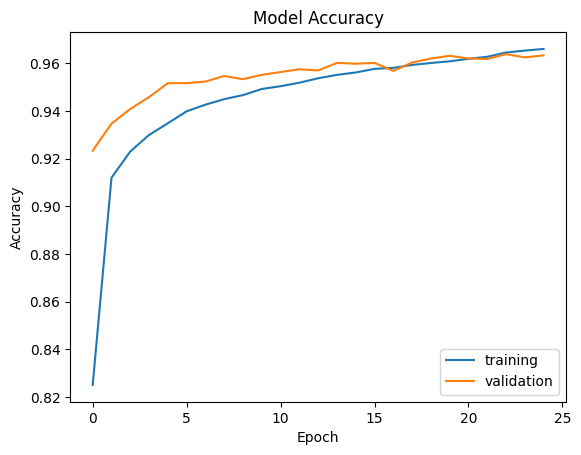

In [6]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(X_train,y_train,batch_size=128, epochs=25, verbose= True,validation_split=0.1)
loss,accuracy=model.evaluate(X_test,y_test,verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show

print(f'Testloss: {loss:.3}')
print(f'Accuracy: {accuracy:.3}')

# C: Using Convolutions instead of all Dense Layers to train on Dataset    

# (4 Points)

Using the Dense Layer model, we achieved around 84% Accuracy. Lets see if
Convolution Layers can help improve the model.
Create a Neural Network model which will use Convolutional Layers to Learn
about the data.

Acheive a Training Accuracy of 90%

In [7]:
#TODO

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Flatten layer to transition from convolutional layers to fully connected layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Print model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

# Compile the Convolutional Neural Netowrk

Epoch 1/25
422/422 [==============================] - 6s 6ms/step - loss: 0.2152 - accuracy: 0.9370 - val_loss: 0.0659 - val_accuracy: 0.9800
Epoch 2/25
422/422 [==============================] - 3s 6ms/step - loss: 0.0599 - accuracy: 0.9814 - val_loss: 0.0508 - val_accuracy: 0.9862
Epoch 3/25
422/422 [==============================] - 2s 5ms/step - loss: 0.0417 - accuracy: 0.9872 - val_loss: 0.0409 - val_accuracy: 0.9878
Epoch 4/25
422/422 [==============================] - 2s 5ms/step - loss: 0.0312 - accuracy: 0.9898 - val_loss: 0.0434 - val_accuracy: 0.9873
Epoch 5/25
422/422 [==============================] - 2s 5ms/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.0609 - val_accuracy: 0.9868
Epoch 6/25
422/422 [==============================] - 2s 5ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0412 - val_accuracy: 0.9895
Epoch 7/25
422/422 [==============================] - 2s 5ms/step - loss: 0.0156 - accuracy: 0.9953 - val_loss: 0.0344 - val_accuracy: 0.9913
Epoch 

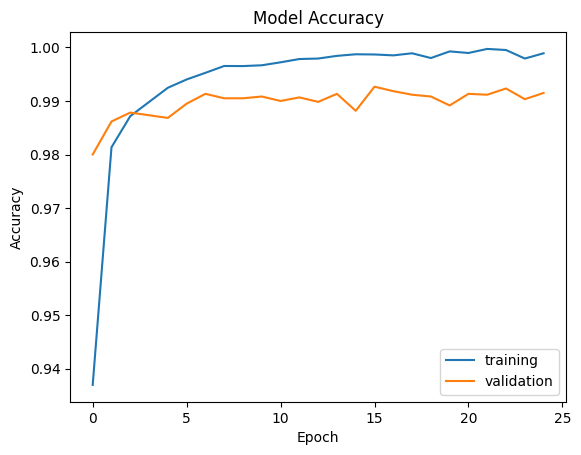

In [8]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(X_train,y_train,batch_size=128, epochs=25, verbose= True,validation_split=0.1)
loss,accuracy=model.evaluate(X_test,y_test,verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show

print(f'Testloss: {loss:.3}')
print(f'Accuracy: {accuracy:.3}')